# Gradient Descent

Gradient descent is an optimization algorithm commonly used to minimize the cost or loss function in machine learning and mathematical optimization. The goal of gradient descent is to iteratively move towards the minimum of a function by adjusting the parameters of the function.

To make this we need to follow these steps:

1.   Objective Function (Cost Function): In the context of machine learning, the function we want to minimize is often referred to as the cost function or loss function. This function measures the difference between the predicted values (output of the model) and the actual values in the training data.


>>> $J(θ)$ Where J is the cost function, and θ represents the parameters of the model.


2.   Gradient: The gradient of a function at a given point is a vector that points in the direction of the steepest increase of the function at that point. In the context of gradient descent, we are interested in the negative gradient, as moving in the opposite direction of the gradient will lead us toward the minimum of the function.

>>>$ΔJ(θ)$  This is a vector of partial derivatives of the cost function with respect to each parameter $(θi)$. The negative gradient gives the direction of the steepest decrease in the cost function.

3. Update Rule: The parameters $(θ)$ are updated in the opposite direction of the gradient to reduce the cost function. The update rule is given by:  
$θ=θ−α∇J(θ)$
Here, α is the learning rate, which determines the size of the steps taken in the parameter space. It's a crucial hyperparameter that needs to be chosen carefully. Too small a learning rate may result in slow convergence, while too large a learning rate may cause the algorithm to overshoot the minimum.

4. Iterative Process: Steps 2 and 3 are repeated iteratively until the algorithm converges to a minimum. In each iteration, the parameters are updated, and the cost function is evaluated at the new set of parameters.

<img src= "https://149695847.v2.pressablecdn.com/wp-content/uploads/2022/07/image-99-1300x1257.png" >

# Minimizing a Single Variable Function

To comprehend gradient descent, it's necessary to import specific Python packages and establish a straightforward function with a single variable.







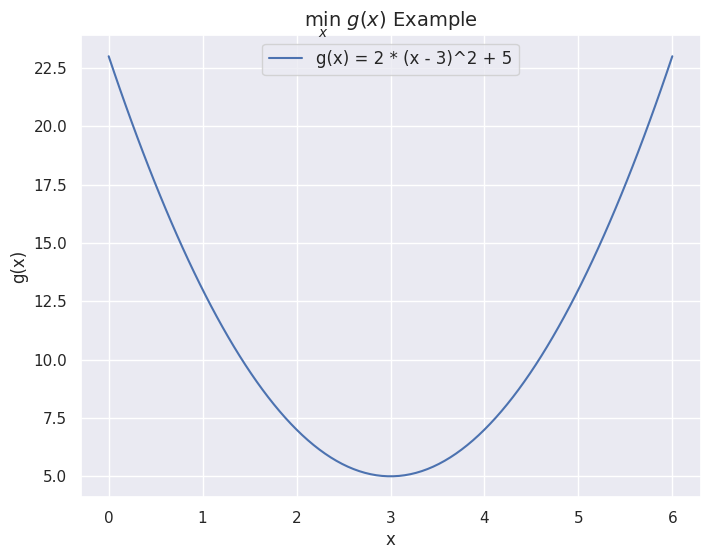

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define a simple quadratic test function
def g(x):
    return 2 * (x - 3)**2 + 5

# Define domain variables for plotting h
domain = np.linspace(0, 6, 100)

# Plot the function g(x)
plt.figure(figsize=(8, 6))
plt.plot(domain, g(domain), label="g(x) = 2 * (x - 3)^2 + 5")
plt.xlabel("x", fontsize=12)
plt.ylabel("g(x)", fontsize=12)
plt.legend(fontsize=12, loc="upper center")
plt.title("$\min_x$ $g(x)$ Example", fontsize=14)
plt.show()


# The Problem Description

For the quadratic function
$g(x)=2(x−3)^2 + 5$ let's the global minimum is $g(x)=5$ occuring at $x=3$. If we were not already aware of the solution, how could we go about discovering it?

* Start with a guess:
>Let's say that out first guess that the minimum value of $g(x)$ occurs at $g(x)= 6$. We can visualize the point $(6,g(6))$ by running the following code in the cell below.

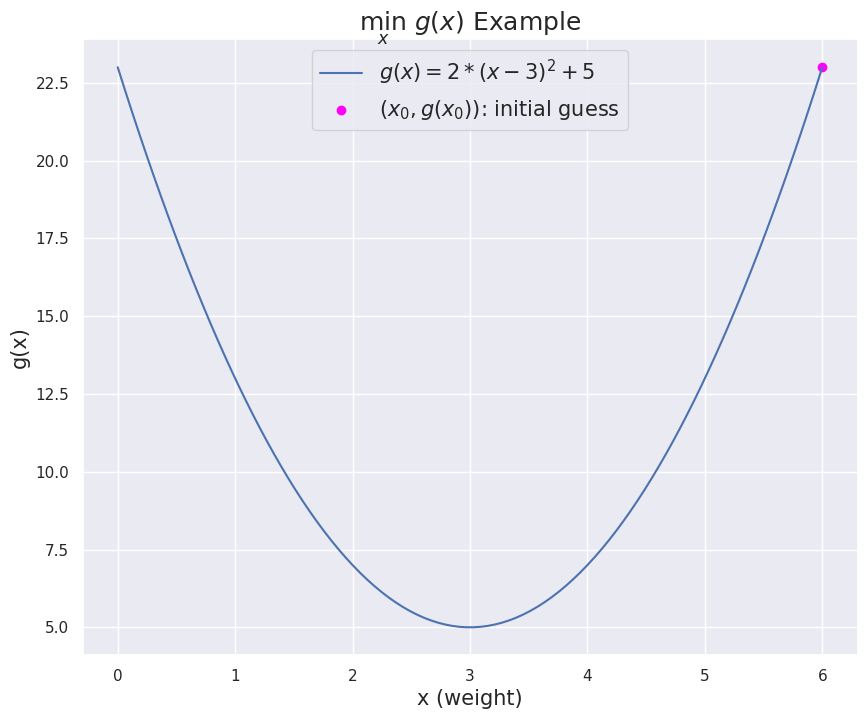

In [24]:
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 2 * (x - 3)^2 + 5$")
plt.scatter([6], [g(6)], color = "magenta", label = "$(x_0, g(x_0))$: initial guess")
plt.xlabel("x (weight)", fontsize = 15)
plt.ylabel("g(x)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_x$ $g(x)$ Example", fontsize = 18)
plt.show()

* The General Idea:
>The fundamental concept of gradient descent involves utilizing the gradient (or derivative in the case of single-variable functions) to determine a direction for exploration. This characteristic makes gradient descent a first-order method. For example, with our function $g$ and initial guess $g(x_0)=6$, suppose we are able to calculate the value of the gradient (the derivative) of $g(x_0)$ at $x=6$. This numerical value will give us the slope of the tangent line to $g(x)$ at $x_0$. Note that $g'(x)= 4(x-3)$

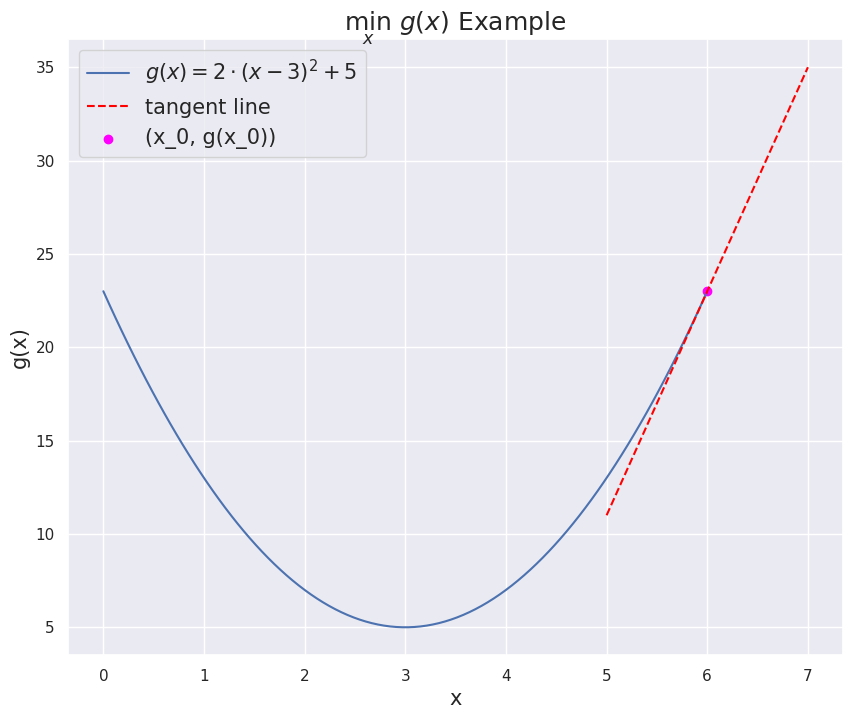

In [25]:
# Define parabola derivative
def dg(x):
    return 4 * (x - 3)

# Choose x_0
x_0 = 6.0

# Define tangent line function for visualization
def tangent_line(x_i, function, derivative, i=0, color="magenta", show=True):
    # Define tangent line
    # y = m * (x - x1) + y1
    def line(x):
        return derivative(x_i) * (x - x_i) + function(x_i)

    xrange = np.linspace(x_i - 1, x_i + 1, 10)
    if show:
        plt.plot(xrange,
                 line(xrange),
                 '--',
                 linewidth=1.5,
                 color="red",
                 label="tangent line")
    plt.scatter([x_i], [function(x_i)], color=color, label=f"(x_{i}, g(x_{i}))")

# Plot the figure
plt.figure(figsize=(10, 8))
# Plot the function
plt.plot(domain, g(domain), label="$g(x) = 2 \cdot (x - 3)^2 + 5$")
# Visualize the tangent line
tangent_line(x_0, g, dg)

# Label the figure
plt.xlabel("x", fontsize=15)
plt.ylabel("g(x)", fontsize=15)
plt.legend(fontsize=15)
plt.title("$\min_x$ $g(x)$ Example", fontsize=18)
plt.show()


* Direction of Descent and the Learning Rate:
> Examining the generated figure from the provided code, it's evident that the tangent line indicates a downward direction, suggesting a path of descent. Meaning, at that point $(6,𝑔(6))$, the tangent line has a positive slope. This indicates that we need move in the negative direction (to the left of $x_0=6$) if we wish to move to a smaller value of $g(x)$. That is, **we need to move in the direction opposite of the sign of the derivative of** $g(x)$ **at** $x_0=6$

* But how ar should we move?
>The value of how far to move in the opposite sign of the derivative of $g(x)$ at $x_0=6$ is called **the learning rate**, and is typically denoted by $α$. The process of multiplying the derivative of $g(x)$ at $x_0=6$ by the learning rate and forming a new choice of $x$ by subtracting this quantity from $x_0$ is called **gradient descent**. For example, we may apply gradient descent at $x_0$ and form a new $x$, say $x_1$, with the following update:

>>$x_n+1=x_n-αg'(x_n)$  
>>(Gradient Descent Update Rule for a Function of one Variable)

The selection of α in machine learning is often determined through experimentation, although more advanced techniques, such as line-search and trust-region methods.


Executing the code in the cell below involves implementing a single iteration of the gradient descent algorithm by selecting $α=0.5$ as value.


x_0 = 6.0
x_1 = 3.5999999999999996


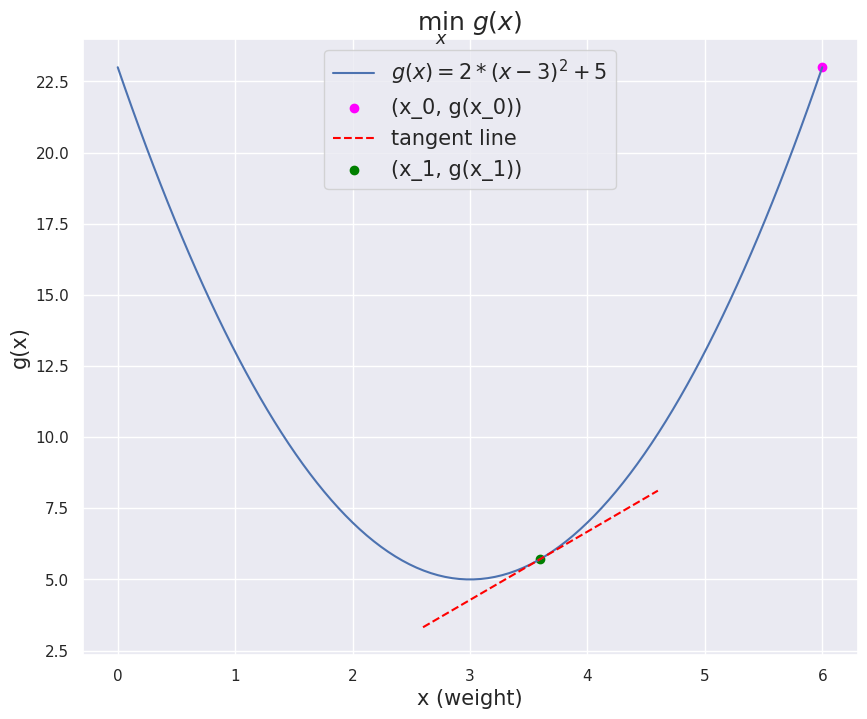

In [26]:
# Initialize choice of w
x_0 = 6.0

# Set learning rate
alpha = 0.2

# Moving in the opposite direction of the derivative at w_0
x_1 = x_0 - alpha*dg(x_0)

# Print the sequence of w variables
print(f"{x_0 = }")
print(f"{x_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 2 * (x - 3)^2 + 5$")

# Visualize the tangent lines
tangent_line(x_0, g, dg, show = False)
tangent_line(x_1, g, dg, i = 1, color = "green")

# Plot labels
plt.xlabel("x (weight)", fontsize = 15)
plt.ylabel("g(x)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_x$ $g(x)$", fontsize = 18)
plt.show()


Observe that the updated estimate, denoted as $x_1$, results in a new pair $(x_1,g(x_1))$, representing a superior selection for both an extremum and the minimum value of
$g$ compared to the initial guess
$x_0$. This movement indicates a **descent along the function**
$g$. Let's proceed further and see where we end up by running the following code in the cell below.

x_0 = 6.0
x_1 = 3.5999999999999996
x_2 = 3.12


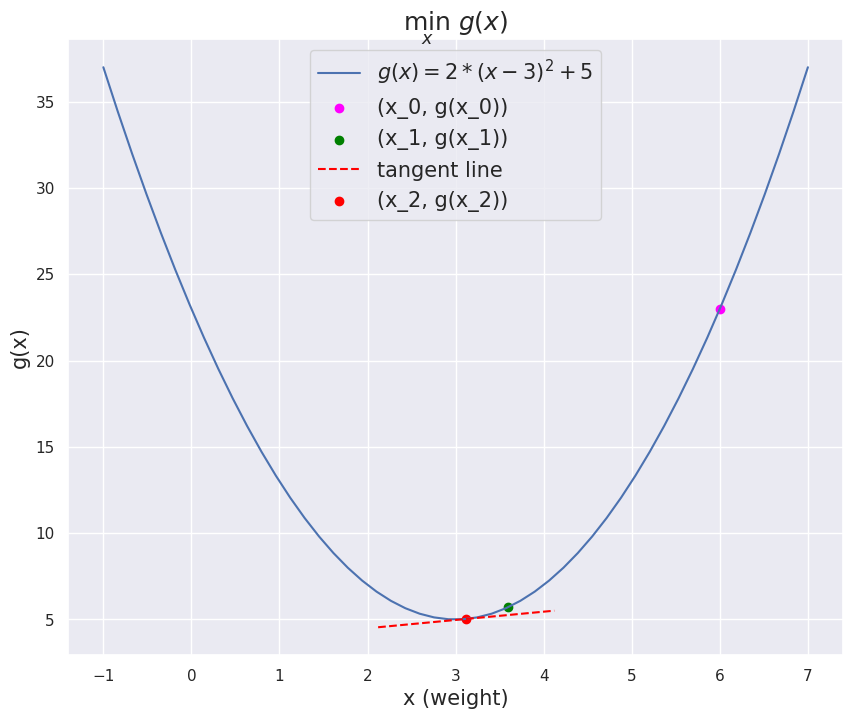

In [14]:
# Moving in the opposite direction of the derivative at x_1 with the updated learning rate
x_2 = x_1 - alpha * dg(x_1)

# Print the sequence of x variables
print(f"{x_0 = }")
print(f"{x_1 = }")
print(f"{x_2 = }")

# Plot the figure
plt.figure(figsize=(10, 8))
plt.plot(domain, g(domain), label="$g(x) = 2 * (x - 3)^2 + 5$")

# Visualize the tangent lines
tangent_line(x_0, g, dg, show=False)
tangent_line(x_1, g, dg, i=1, color="green", show=False)
tangent_line(x_2, g, dg, i=2, color="red")

# Plot labels
plt.xlabel("x (weight)", fontsize=15)
plt.ylabel("g(x)", fontsize=15)
plt.legend(fontsize=15, loc="upper center")
plt.title("$\min_x$ $g(x)$", fontsize=18)
plt.show()



Now we do it one more time

x_0 = 6.0
x_1 = 3.5999999999999996
x_2 = 3.12
x_3 = 3.024


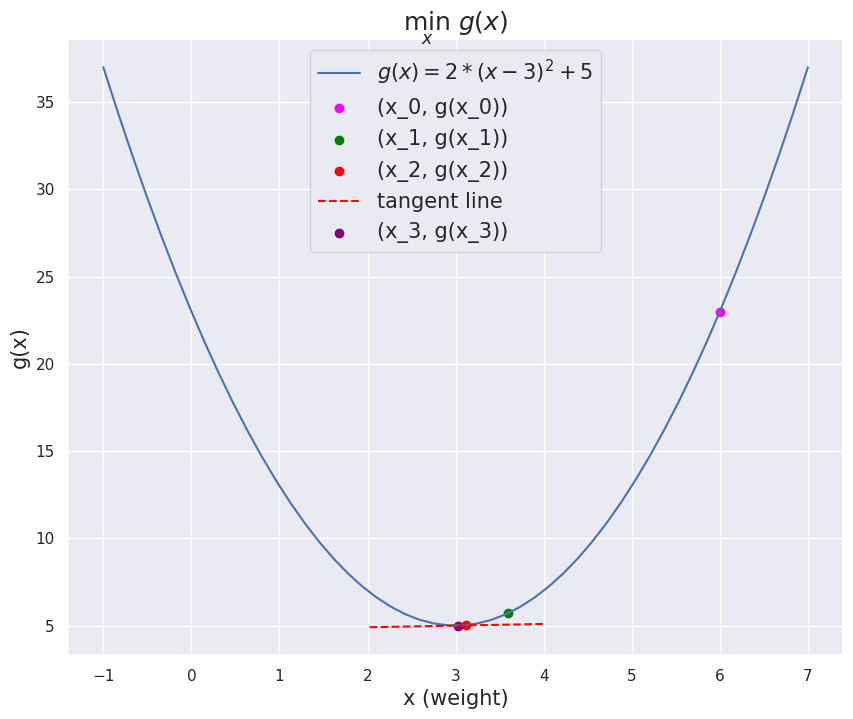

In [15]:
# Moving in the opposite direction of the derivative at x_2 with the updated learning rate
x_3 = x_2 - alpha * dg(x_2)

# Print the sequence of w variables
print(f"{x_0 = }")
print(f"{x_1 = }")
print(f"{x_2 = }")
print(f"{x_3 = }")

# Plot the figure
plt.figure(figsize=(10, 8))
plt.plot(domain, g(domain), label="$g(x) = 2 * (x - 3)^2 + 5$")

# Visualize the tangent lines
tangent_line(x_0, g, dg, show=False)
tangent_line(x_1, g, dg, i=1, color="green", show=False)
tangent_line(x_2, g, dg, i=2, color="red", show=False)
tangent_line(x_3, g, dg, i=3, color="purple")

# Plot labels
plt.xlabel("x (weight)", fontsize=15)
plt.ylabel("g(x)", fontsize=15)
plt.legend(fontsize=15, loc="upper center")
plt.title("$\min_x$ $g(x)$", fontsize=18)
plt.show()


We can efficiently repeat the process of updating $x_1$ by implementing a function named derivative_descent. Experiment with the code provided in the cell below.

x_0 = 6.0 | dg(x_0) = 12.0
x_1 = 3.6 | dg(x_1) = 2.3999999999999986
x_2 = 3.12 | dg(x_2) = 0.4800000000000004
x_3 = 3.02 | dg(x_3) = 0.09600000000000009
x_4 = 3.0 | dg(x_4) = 0.019199999999999662
x_5 = 3.0 | dg(x_5) = 0.0038400000000002876
x_6 = 3.0 | dg(x_6) = 0.0007680000000007681



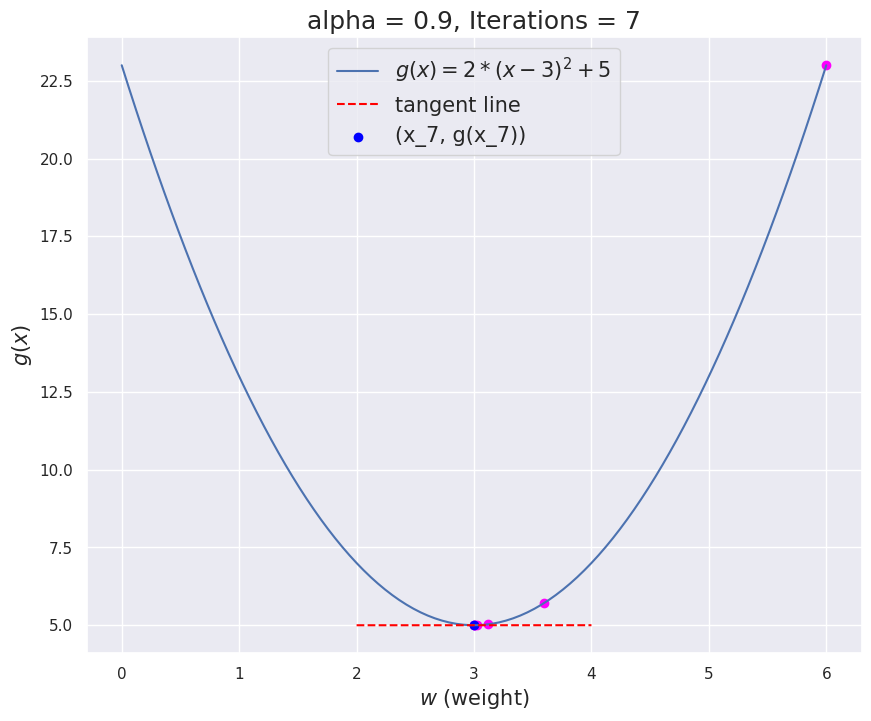

In [34]:
def derivative_descent(derivative, alpha = 0.2, x_0 = 6.0, max_iter = 100):
    X = [x_0]
    i = 0
    while abs(derivative(X[-1])) > 0.001 and abs(X[-1])< 1000 and i < max_iter:
        x_new = X[-1] - alpha*dg(X[-1])
        X.append(x_new)
        i += 1
    X = np.array(X)

    return X

X = derivative_descent(dg)

for i, x in enumerate(X):
    print(f"x_{i} = {np.round(x, decimals = 2)} | dg(x_{i}) = {dg(x)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, g(domain), label = "$g(x) = 2 * (x - 3)^2 + 5$")
plt.scatter(X, g(X), color = "magenta")
tangent_line(X[-1], g, dg, i = len(X), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$g(x)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(X)}", fontsize = 18)
plt.show()

* Testing different choices of the Learning Rate α:

We can assess the effectiveness of our chosen learning rate α by comparing it with various alternatives. Execute the code in the cell below and observe the results.

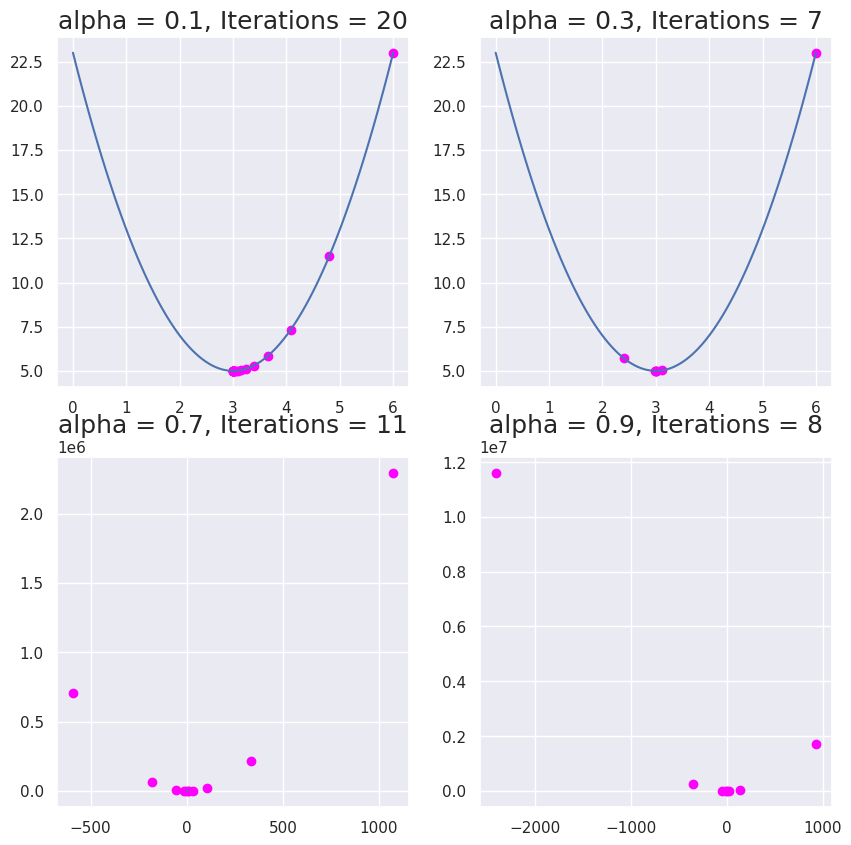

In [35]:
# Possible choices of learning rate
alphas = [0.1, 0.3, 0.7, 0.9]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    X = derivative_descent(dg, alpha = alpha)
    ax.plot(domain, g(domain))
    ax.scatter(X, g(X), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(X)}", fontsize= 18)

In [29]:
g(domain)

array([23.        , 22.28007346, 21.5748393 , 20.88429752, 20.20844812,
       19.54729109, 18.90082645, 18.26905418, 17.65197429, 17.04958678,
       16.46189164, 15.88888889, 15.33057851, 14.78696051, 14.25803489,
       13.74380165, 13.24426079, 12.7594123 , 12.2892562 , 11.83379247,
       11.39302112, 10.96694215, 10.55555556, 10.15886134,  9.7768595 ,
        9.40955005,  9.05693297,  8.71900826,  8.39577594,  8.087236  ,
        7.79338843,  7.51423324,  7.24977043,  7.        ,  6.76492195,
        6.54453627,  6.33884298,  6.14784206,  5.97153352,  5.80991736,
        5.66299357,  5.53076217,  5.41322314,  5.31037649,  5.22222222,
        5.14876033,  5.08999082,  5.04591368,  5.01652893,  5.00183655,
        5.00183655,  5.01652893,  5.04591368,  5.08999082,  5.14876033,
        5.22222222,  5.31037649,  5.41322314,  5.53076217,  5.66299357,
        5.80991736,  5.97153352,  6.14784206,  6.33884298,  6.54453627,
        6.76492195,  7.        ,  7.24977043,  7.51423324,  7.79

* Minimizing Functions of Several Variables


All the concepts mentioned earlier naturally extend to functions with multiple variables by replacing the single-variable derivative with the gradient. Before delving into this concept, it is crucial to underscore the broad, unconstrained optimization problem.

We will now provide a particular solution to this problem by concentrating on a function with two variables. However, it's essential to note that all the concepts discussed can be applied to functions with any arbitrary and finite number of variables. In a general sense, gradient descent can now be meaningfully defined:

>>$x←x-α \nabla g'(x)$  
>>(True Gradient Descent)


Now that we have established the definition of multivariable gradient descent, let's explore the multivariable function $g(x_0,x_1)=x_{0}^2 + x_{1}^2 + 1$ which has an obvious minimum at the vector $\textbf{x}=[0.0,0.0]^T$. To visualize this function run the following code in the cell below.

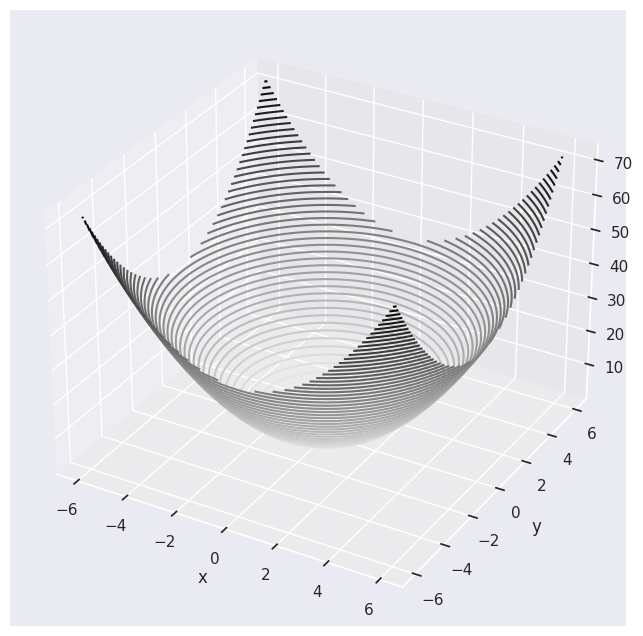

In [ ]:
from mpl_toolkits import mplot3d

def g(x_0, x_1):
    return x_0 ** 2 + x_1 ** 2 + 1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = g(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

The visualization in the preceding code cell might be challenging to interpret. To address this, consider executing the following code in the cell below.

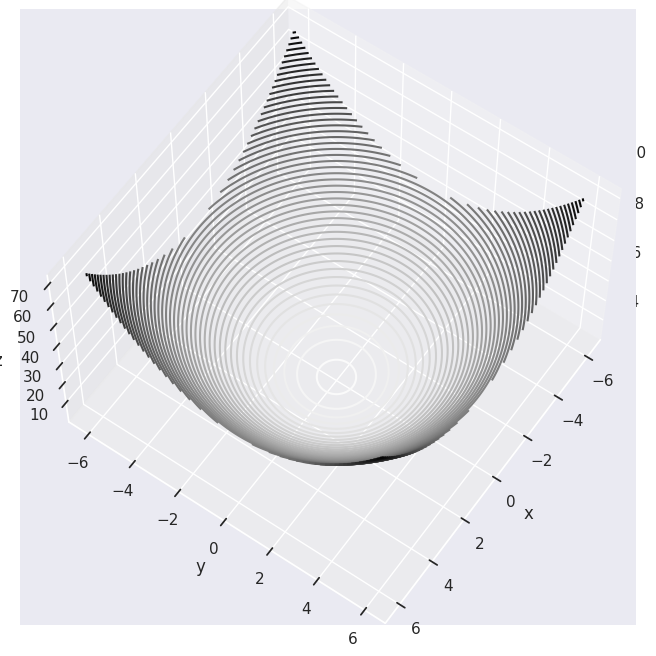

In [ ]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = g(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

* True Gradient Descent


Having obtained a clear visualization of our multivariable function, we proceed to define the derivative of our function and modify our gradient descent function to accommodate such functions. Execute the following code in the cell below.

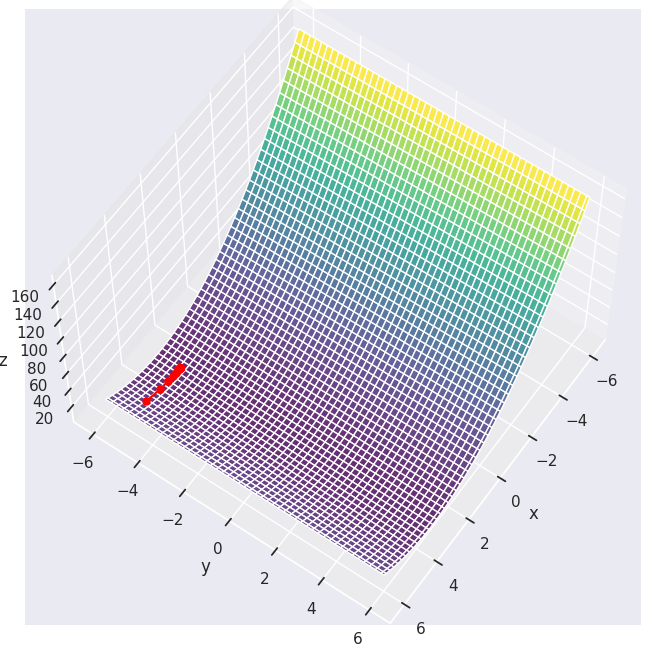

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return 2 * (x[0] - 3)**2 + 5

def dg(x):
    grad = [4 * (x[0] - 3), 0]  # Derivative of g with respect to x
    return np.array(grad)

def gradient_descent(derivative, X, alpha=0.8, max_iter=1_000):
    i = 0
    X_hist = [X]
    while i < max_iter:
        X = X - alpha * derivative(X)
        i += 1
        X_hist.append(X)

    return X_hist

X_start = np.array([5.0, -5.0])
X_history = gradient_descent(dg, X_start, alpha=0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = g(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot([point[0] for point in X_history],
        [point[1] for point in X_history],
        [g(point) for point in X_history], color='red', marker='o', markersize=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()


# Conclusion
As illustrated in this notebook, gradient descent serves as a straightforward approach for optimizing convex functions. In the subsequent notebook, we delve into its application for training single neuron models through this iterative process.